# Supplemental figures 3 D & E

In [1]:
library(Seurat) 
library(Signac) 
library(BSgenome.Hsapiens.UCSC.hg38)
library(JASPAR2018)
library(TFBSTools)
library(chromVAR)
set.seed(1234)
library(openxlsx)
library(here)
library(future)
library(ggplot2)
library(BiocParallel)
library(stringr)
library(harmony)
library(dplyr)
library(RColorBrewer)
library(pheatmap)

Loading required package: SeuratObject

Loading required package: sp




Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following object is masked from ‘package:SeuratObject’:

    intersect


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

In [ ]:
setwd("your/working/dir")

In [3]:
#load integrated seurat object
sobj <- readRDS("path_to_rds")

In [4]:
Idents(object = sobj) <- "treatment_and_guidecapture"

In [5]:
# Normalize the data
sobj <- NormalizeData(sobj)

In [6]:
sobj

An object of class Seurat 
344955 features across 7994 samples within 4 assays 
Active assay: SCT (22084 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: ATAC, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [8]:
# Find variable features (genes)
sobj <- FindVariableFeatures(sobj, selection.method = "vst", nfeatures = 500)

In [9]:
# Perform pseudobulking by averaging expression within clusters
# Average expression per cluster
avg_expression <- AverageExpression(sobj, return.seurat = TRUE, assays = "SCT", group.by = "treatment_and_guidecapture")

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.
Centering and scaling data matrix



In [10]:
# Extract the expression matrix for variable genes
variable_genes <- VariableFeatures(sobj)
expression_matrix <- avg_expression@assays$SCT$data[variable_genes,]

In [11]:
# Optional: Scale the data (Z-score normalization) for better heatmap visualization
expression_matrix_scaled <- t(scale(t(expression_matrix)))

In [23]:
expression_matrix_scaled

,DASA-ADNP,DASA-BRD2,DASA-CHD2,DASA-GPBP1L1,DASA-HIC2,DASA-KMT2B,DASA-NT,DASA-PIAS1,DASA-PLAGL2,DASA-PQBP1,⋯,DMSO-GPBP1L1,DMSO-HIC2,DMSO-KMT2B,DMSO-MNT,DMSO-NT,DMSO-PIAS1,DMSO-SLTM,DMSO-YEATS4,DMSO-ZBED6,DMSO-ZNF669
HBZ,0.9310578,0.86978436,1.0208575,0.92824694,1.130282880,0.932695224,0.97328338,0.9848828,0.8423360,1.05327614,⋯,-0.81356688,-0.61846791,-1.11352844,-1.1790233,-0.9893290,-1.13684960,-0.61738545,-1.11772827,-1.0775340,-0.72778292
HBG2,0.7827096,0.42912680,1.0303726,0.86321772,1.460345975,0.905326753,0.92319534,1.0017717,1.1573749,0.99982580,⋯,-0.96125118,-0.15587733,-0.96834576,-1.0513538,-1.0533004,-1.09379022,-0.60939282,-0.96418366,-1.1528124,-0.83300288
AC016074.2,-0.7515972,-0.75159722,-0.7515972,-0.75159722,-0.745421089,-0.751597225,-0.74655096,-0.7453720,-0.7515972,-0.73298517,⋯,0.28099974,0.91728060,1.39842161,0.1307201,0.1357644,2.84532579,0.13564134,0.76689780,0.3637777,-0.22564403
LINC01811,3.3114967,-0.47021809,-0.4657726,2.04838209,-0.001766192,-0.400941641,0.48550400,0.2066675,0.8287160,1.03285419,⋯,0.18194889,-0.76542471,-0.92364049,-0.7559777,-0.7106139,-0.67537827,-0.08921968,-0.52648556,-0.5604323,-0.91852101
HBD,-0.2788763,-0.27607441,0.7300172,0.35092880,-0.308057273,0.480200457,0.44456518,0.9800785,2.3378960,-0.12618233,⋯,-0.84599352,-0.49893033,-0.71766834,-0.8628590,-0.8414417,-0.69838589,-0.38692187,-0.54153541,-0.8188458,-0.79248196
MT2A,-0.9531697,-0.75847176,-0.6601067,-0.83739115,-0.809808049,-0.791498061,-0.81483912,-0.8818387,-0.9531697,-0.89319284,⋯,1.47445847,0.91050512,0.00463241,0.5771449,0.2944001,0.07555327,1.47091526,2.43388683,1.8510515,0.99332745
APOE,1.3194701,0.62051095,1.1534464,0.92090699,0.307089054,1.127995573,1.06399973,1.3491785,1.3228308,0.69644832,⋯,-1.00612019,-1.46973979,-1.01210137,-0.7810605,-0.8253199,-0.87931706,-0.78103800,-1.10020655,-0.7505651,-1.03473034
HBG1,0.6921978,0.32046072,0.7461299,0.86070849,1.612582462,0.866091404,0.95348262,1.0904665,1.1963279,1.01025909,⋯,-0.98236652,-0.02209096,-1.11561200,-1.2245926,-1.0187490,-1.09669865,-0.56411351,-0.91670565,-1.0615074,-0.79838928
CCDC26,-0.6580688,-0.59306717,-0.9459652,-0.89451533,-0.672745934,-0.939923848,-0.91271293,-0.9307915,-0.9101099,-0.92067423,⋯,1.13899902,1.94038480,1.66968809,0.5650677,0.4638011,0.78174863,0.74690383,1.38306343,1.3712564,0.14585072
SLC25A37,0.8030509,0.55635718,0.9409946,0.90661890,1.156621980,1.065693529,0.96961274,1.0305085,1.1665654,1.32788354,⋯,-0.68875521,-0.53046835,-0.94533350,-1.0260954,-0.9718051,-1.19767424,-0.73913439,-1.12266193,-0.8556165,-0.90275828


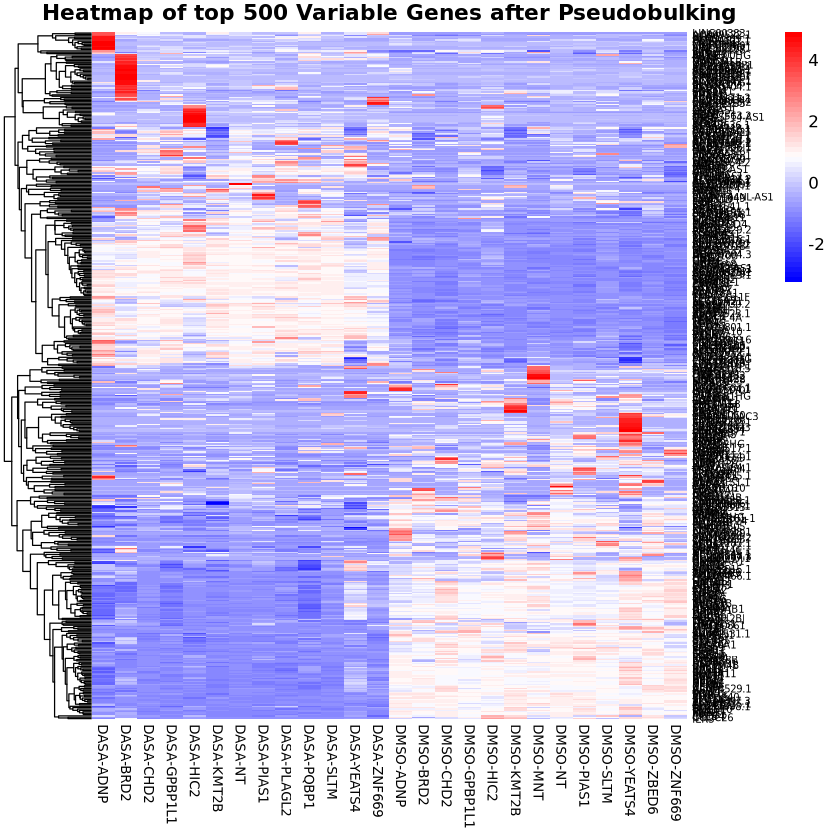

In [13]:
# Step 3: Plot the heatmap
pheatmap(expression_matrix_scaled, 
         cluster_rows = T, 
         cluster_cols = F, 
         show_rownames = TRUE, 
         show_colnames = TRUE,
         main = "Heatmap of top 500 Variable Genes after Pseudobulking",
         color = colorRampPalette(c("blue", "white", "red"))(50),
         fontsize_row = 6, # Adjust row font size for readability
         fontsize_col = 8) # Adjust column font size for readability

In [5]:
DefaultAssay(sobj) <- "ATAC"

In [6]:
sobj <- NormalizeData(sobj)

In [7]:
sobj <- FindTopFeatures(sobj, min.cutoff = "q50")  # Top 50% most accessible peaks


In [8]:
sobj <- RunTFIDF(sobj)  # Perform TF-IDF normalization to focus on accessibility differences


Performing TF-IDF normalization

Warning message in RunTFIDF.default(object = GetAssayData(object = object, slot = "counts"), :
“Some features contain 0 total counts”


In [9]:
# Step 2: Pseudobulking - Calculate average accessibility per cluster
avg_accessibility <- AverageExpression(sobj, assays = "ATAC", group.by = "treatment_and_guidecapture", return.seurat = TRUE)

As of Seurat v5, we recommend using AggregateExpression to perform pseudo-bulk analysis.
This message is displayed once per session.
Names of identity class contain underscores ('_'), replacing with dashes ('-')
This message is displayed once every 8 hours.
Centering and scaling data matrix



In [10]:
# Extract the matrix of average accessibility for the variable peaks
variable_peaks <- VariableFeatures(sobj, nfeatures = 50)
accessibility_matrix <- avg_accessibility@assays$ATAC$data[variable_peaks, ]

In [11]:
# Optional: Scale the data for better heatmap visualization
accessibility_matrix_scaled <- t(scale(t(accessibility_matrix)))

In [12]:
accessibility_matrix_scaled

,DASA-ADNP,DASA-BRD2,DASA-CHD2,DASA-GPBP1L1,DASA-HIC2,DASA-KMT2B,DASA-NT,DASA-PIAS1,DASA-PLAGL2,DASA-PQBP1,⋯,DMSO-GPBP1L1,DMSO-HIC2,DMSO-KMT2B,DMSO-MNT,DMSO-NT,DMSO-PIAS1,DMSO-SLTM,DMSO-YEATS4,DMSO-ZBED6,DMSO-ZNF669
chr3-93470131-93471053,0.84142646,2.542959390,-0.05840208,0.14410981,0.62113467,-0.17465455,0.406242325,0.377114502,0.5947131,0.90382721,⋯,-0.91149646,-0.86008295,-0.78385114,-0.69602823,-0.786240197,-1.110810966,-0.68250818,0.393684606,-0.64921079,-0.37736117
chr22-21735480-21736401,-1.35368040,0.587799378,0.93409712,0.90823683,-0.39226151,0.46473280,0.514602730,0.693414775,0.4654741,-0.61122053,⋯,-1.40996898,-1.09499108,-1.04393965,1.01832774,-0.347539144,-0.924843771,0.16553481,-0.968615553,-1.35690257,1.21984527
chr22-20858385-20859260,2.02284511,2.754021175,0.33426495,0.44963180,-0.39320265,0.58502036,0.405281632,0.522197819,-1.1372596,0.30167045,⋯,0.24735377,-1.08562241,-0.07119507,-1.97880564,-0.309304754,0.459127915,-0.84900738,-0.421496200,-0.81768258,-0.56075691
chr1-30717972-30718870,2.03145887,1.492120805,0.73857032,-1.49742082,0.63485195,-1.62062111,-0.411233838,-0.244219741,-2.2136905,-0.69361640,⋯,-0.36111632,1.34741377,-0.03249676,-0.82850481,0.076201819,0.423451008,-0.71729955,0.860027658,-0.87476056,-0.61452470
chr9-120868454-120869375,2.24777087,-0.521598357,-0.66309719,-0.05406059,-0.18046829,0.51837421,-0.234457934,-0.667657305,-1.1793927,-0.79873134,⋯,0.67688303,0.33036879,-0.40727987,1.19442398,0.070314146,-1.259394645,2.05962339,0.676520038,-0.23019934,-1.27294917
chr13-91347117-91348053,-0.05126821,-0.235945126,0.97780347,1.02295155,-0.06980228,1.24320954,1.001246827,0.916234394,0.2693746,-0.48968003,⋯,-0.44865416,-0.97151116,-1.53528652,-1.39689618,-0.455155795,-0.488485014,-0.41911207,-1.147961293,-0.55339368,-0.67379183
chr22-20702754-20703593,-2.79780374,0.255642615,0.08058005,0.11768422,-0.36589808,-0.65792622,-0.377907374,-0.940067382,-1.6119513,0.96481123,⋯,0.31652689,0.18108679,0.63349573,1.58298688,0.026674848,0.166928128,-0.60885809,0.198472730,0.71636114,0.66409289
chr22-20116861-20117785,-0.69314931,1.345619022,-0.28758345,-0.19163559,-0.30836413,0.93740506,0.396311079,0.651461294,1.3818516,-0.89486624,⋯,-0.79551221,-0.30700007,-0.28867309,-2.97679191,0.354792365,-0.617701352,0.52210535,-0.344183710,0.39292427,0.19860355
chr22-19122100-19123009,-1.00438654,1.425153115,-0.11075622,-0.57752963,-0.08329855,1.43241311,0.410609025,1.402868513,-0.8074295,0.78577099,⋯,0.19467145,-0.76735866,-0.54938064,0.03113910,-0.493982745,-1.634691517,1.21423313,-1.174983444,1.10450135,-0.08671642
chr9-131125077-131125981,2.38734137,1.517922321,0.05778673,0.94463021,0.58610859,0.21076501,0.700112006,0.481625368,1.3923729,1.27094206,⋯,-0.19252756,-0.65951602,-0.48839024,-1.61959156,-0.649346177,-0.814020654,-1.28746584,-1.524687547,-0.79150280,-0.59036115


In [ ]:
# Step 3: Plot the heatmap
pheatmap(accessibility_matrix_scaled, 
         cluster_rows = TRUE, 
         cluster_cols = F, 
         show_rownames = F, 
         show_colnames = TRUE,
         main = "Heatmap of Variable Peak Accessibility after Pseudobulking",
         color = colorRampPalette(c("blue", "white", "red"))(50),
         fontsize_row = 6,  # Adjust row font size for readability
         fontsize_col = 8)  # Adjust column font size for readability